In [67]:
import sys
# from python_environment_check import check_packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

        
def decision_Perceptron(X,y): 
        
    # Convert y to a 1D array using ravel()
    y = y.to_numpy().ravel()
    print('Class labels:', np.unique(y))
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)
    from sklearn.preprocessing import StandardScaler
#    sc = StandardScaler()
    sc = MinMaxScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    X_train_std = X_train
    X_test_std = X_test
 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
    knn.fit(X_train_std, y_train)

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    return X_combined_std,y_combined,knn


def successor(Ivar,Nem,df,Pred): 
#ivaros = 0; ivartalan=1
    # m_df = join (dfIprev, dfInext)
    df.sort_values(["run","place","when"], inplace=True)
    dfIprev = df[((df['ivar'] == Ivar) & (df['nem'] == Nem))] 
    dfInext = df
    m_df = pd.merge(dfIprev,dfInext, on=["run","place","division","when","who","withwho","total","WLT","hurdless","colour"])
    print("Column names:", m_df.columns.tolist())
    m_df.head()
    m_dn = m_df[((m_df['running_x'] + 1) == m_df['running_y']) ]
    m_df = m_dn[m_dn['chip_szam_x'] != m_dn['chip_szam_y']]
    m_df.head()
    m_df['pred'] = Pred
 
    return m_df

'text/html'

'<style>.container { width:550% !important; }</style>'

In [68]:
df = pd.DataFrame()
df = pd.read_csv('03.WildRunner.joined_versenyadatok.csv',sep=';', encoding='utf-8')

In [69]:
#colour_mapping = {'P': 0,'K': 1}
print(sorted(df['colour'].unique()))
colour_mapping = {label: idx for idx, label in enumerate(np.unique(df['colour']))}
df['colour'] = df['colour'].map(colour_mapping)
colour_mapping
#df
#WLT_mapping = {'W': 0,'L': 1,'T': 2}
print(sorted(df['WLT'].unique()))
WLT_mapping = {label: idx for idx, label in enumerate(np.unique(df['WLT']))}
df['WLT'] = df['WLT'].map(WLT_mapping)
WLT_mapping
name_mapping = {label: idx for idx, label in enumerate(np.unique(df['name']))}
df['name'] = df['name'].map(name_mapping)
name_mapping
print(sorted(df['ivar'].unique()))
ivar_mapping = {label: idx for idx, label in enumerate(np.unique(df['ivar']))}
df['ivar'] = df['ivar'].map(ivar_mapping)
ivar_mapping
print(sorted(df['chip_szam'].unique()))
chip_szam_mapping = {label: idx for idx, label in enumerate(np.unique(df['chip_szam']))}
df['chip_szam'] = df['chip_szam'].map(chip_szam_mapping)
chip_szam_mapping
print(sorted(df['who'].unique()))
who_mapping = {label: idx for idx, label in enumerate(np.unique(df['who']))}
df['who'] = df['who'].map(who_mapping)
who_mapping



['K', 'P']
['L', 'T', 'W']
['ivaros', 'ivartalan']
[93900001206699, 93900001547455, 93900001569304, 93900001974600, 93900002110777, 93900002501294, 93900002523549, 93900002731726, 93900002928155, 93900002949462, 93900002956276, 93900003495780, 93900003589833, 93900003598960, 93900003669802, 93900003818036, 93900003826751, 93900003827629, 93900003871143, 93900004198045, 93900004293075, 93900004371167, 93900005172450, 93900005238999, 93900005539134, 93900005627226, 93900005669853, 93900005854271, 93900006680519, 93900006876951, 93900007138387, 93900007189034, 93900007209752, 93900007218892, 93900007664925, 93900007728423, 93900008222471, 93900008401355, 93900008474491, 93900008694414, 93900008748969, 93900008830504, 93900008979908, 93900009309522, 93900009320601, 93900009646655, 93900009650506, 93900009738344, 93900009815888, 93900009884426]
['WildRunners Maximini', 'WildRunners Nightfall', 'WildRunners Wonders', 'WildRunners XXL', 'WildRunners Zephyr', 'WildRunners dreamers', 'WildRunne

{'WildRunners Maximini': 0,
 'WildRunners Nightfall': 1,
 'WildRunners Wonders': 2,
 'WildRunners XXL': 3,
 'WildRunners Zephyr': 4,
 'WildRunners dreamers': 5,
 'WildRunners hopefuls': 6}

In [70]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
#    count number of rows with missing values
#    n_miss = df[[i]].isnull().sum()
    n_miss = df.iloc[:, i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)


In [72]:
print("Column names:", df.columns.tolist())
df.head()

Column names: ['felvezeto', 'nev', 'fajta', 'nem', 'ivar', 'szuletesi_datum', 'chip_szam', 'ulna_hossz', 'ugrasi_magassag', 'run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running', 'dog', 'name', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'ivarlabel', 'chip_szamlabel', 'wholabel']


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,run,...,running,dog,name,start,colourlabel,WLTlabel,namelabel,ivarlabel,chip_szamlabel,wholabel
0,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,23,14.05,25.0,BCCCZ mistrovství,...,1,4.31,15,0.040,K,W,Dexter,ivartalan,93900005238999,WildRunners Wonders
1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,23,14.05,25.0,BCCCZ mistrovství,...,1,4.45,15,0.100,K,L,Dexter,ivartalan,93900005238999,WildRunners Wonders
2,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,23,14.05,25.0,BCCCZ mistrovství,...,1,4.29,15,0.050,K,L,Dexter,ivartalan,93900005238999,WildRunners Wonders
3,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,23,14.05,25.0,BCCCZ mistrovství,...,1,4.37,15,0.005,K,L,Dexter,ivartalan,93900005238999,WildRunners Wonders
4,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,23,14.05,25.0,BCCCZ mistrovství,...,1,4.46,15,0.020,K,W,Dexter,ivartalan,93900005238999,WildRunners Wonders


__4 alapeset van az átváltásra__

In [73]:
#ivaros = 0; ivartalan=1
#ivaros kanra vált rá a következő
mik_df =  successor(0,'kan',df,'IKAN')
#ivartalan kanra vált rá a következő
mlk_df =  successor(1,'kan',df,'LKAN')
#ivaros szukára vált rá a következő
mis_df =  successor(0,'szuka',df,'ISZUKA')
#ivartalan szukárara vált rá a következő
mls_df =  successor(1,'szuka',df,'LSZUKA')

y_df = pd.concat([mik_df, mlk_df, mis_df, mls_df], axis=0, ignore_index=True)

print(sorted(y_df['pred'].unique()))
pred_mapping = {label: idx for idx, label in enumerate(np.unique(y_df['pred']))}
y_df['pred'] = y_df['pred'].map(pred_mapping)
print('pred values: ',pred_mapping)
inv_pred_mapping = {v: k for k, v in pred_mapping.items()}
y_df['predlabel'] = y_df['pred'].map(inv_pred_mapping)
print("Column names 2:", y_df.columns.tolist())
y_df.head()
print('pred: ',sorted(y_df['predlabel'].unique()))
value_counts = y_df['pred'].value_counts()
print(value_counts)

Column names: ['felvezeto_x', 'nev_x', 'fajta_x', 'nem_x', 'ivar_x', 'szuletesi_datum_x', 'chip_szam_x', 'ulna_hossz_x', 'ugrasi_magassag_x', 'run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running_x', 'dog_x', 'name_x', 'start_x', 'colourlabel_x', 'WLTlabel_x', 'namelabel_x', 'ivarlabel_x', 'chip_szamlabel_x', 'wholabel_x', 'felvezeto_y', 'nev_y', 'fajta_y', 'nem_y', 'ivar_y', 'szuletesi_datum_y', 'chip_szam_y', 'ulna_hossz_y', 'ugrasi_magassag_y', 'running_y', 'dog_y', 'name_y', 'start_y', 'colourlabel_y', 'WLTlabel_y', 'namelabel_y', 'ivarlabel_y', 'chip_szamlabel_y', 'wholabel_y']
Column names: ['felvezeto_x', 'nev_x', 'fajta_x', 'nem_x', 'ivar_x', 'szuletesi_datum_x', 'chip_szam_x', 'ulna_hossz_x', 'ugrasi_magassag_x', 'run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running_x', 'dog_x', 'name_x', 'start_x', 'colourlabel_x', 'WLTlabel_x', 'namelabel_x', 'ivarlabel_x', 'chip_szamlabel_x', 'whol

__pred values:  {'IvarosKAN': 0, 'IvarosSZUKA': 1, 'ivartaLanKAN': 2, 'ivartaLanSZUKA': 3}__  
__A fenti jelöléseket figyelembe véve az ivaros kanra következő kutyák start eredményei rosszabbak__   
__esetleg az ivaros kutyákra következők startjai is lehetnek rosszabbak__

Class labels: [0 1 2 3]


C:\Users\zertr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


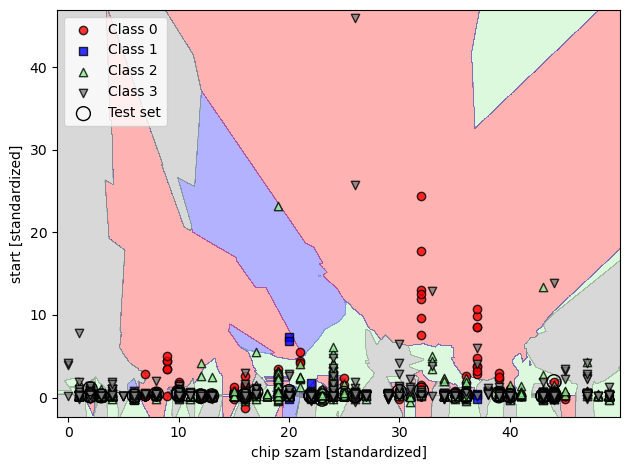

In [74]:
X = y_df.iloc[:, [35, 41]]  # chip_szam_y, start_y
y = y_df.iloc[:, [48]] # pred

X_combined_std, y_combined, knn =  decision_Perceptron(X, y)

from sklearn.tree import DecisionTreeClassifier
plot_decision_regions(X=X_combined_std, 
                      y=y_combined,
                      classifier=knn, 
                      test_idx=range(105, 150))
plt.xlabel('chip szam [standardized]')
plt.ylabel('start [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()


__pred values:  {'IvarosKAN': 0, 'IvarosSZUKA': 1, 'ivartaLanKAN': 2, 'ivartaLanSZUKA': 3}__  
__A fenti jelöléseket figyelembe véve az ivartalanra következő kutyák futás eredményei(dog) rosszabbak__   
__de ez egy gyenge kapcsolat, mással is összefügghet__

Class labels: [0 1 2 3]


C:\Users\zertr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


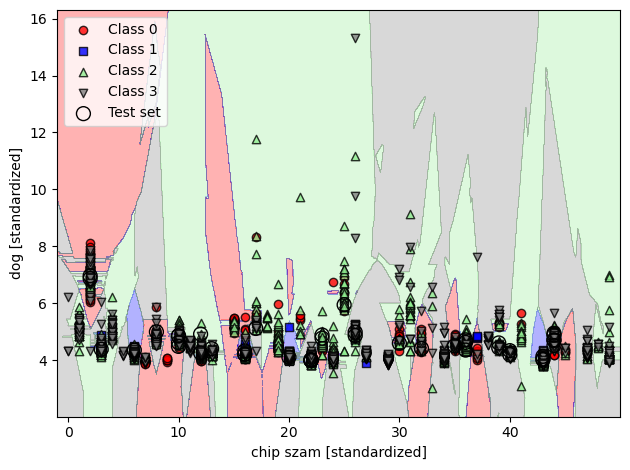

In [75]:
#dog_y
X = y_df.iloc[:, [35, 39]]  # chip_szam_y, dog_y
y = y_df.iloc[:, [48]] # pred

X_combined_std, y_combined, knn =  decision_Perceptron(X, y)

from sklearn.tree import DecisionTreeClassifier
plot_decision_regions(X=X_combined_std, 
                      y=y_combined,
                      classifier=knn, 
                      test_idx=range(105, 150))
plt.xlabel('chip szam [standardized]')
plt.ylabel('dog [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

__pred values:  {'IvarosKAN': 0, 'IvarosSZUKA': 1, 'ivartaLanKAN': 2, 'ivartaLanSZUKA': 3}__  
__A fenti jelöléseket figyelembe véve nem látok kapcsolatot a csapatok futás eredményei(total)__   
__és aközött, hogy milyen rákövetkező futások voltak__

Class labels: [0 1 2 3]


C:\Users\zertr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


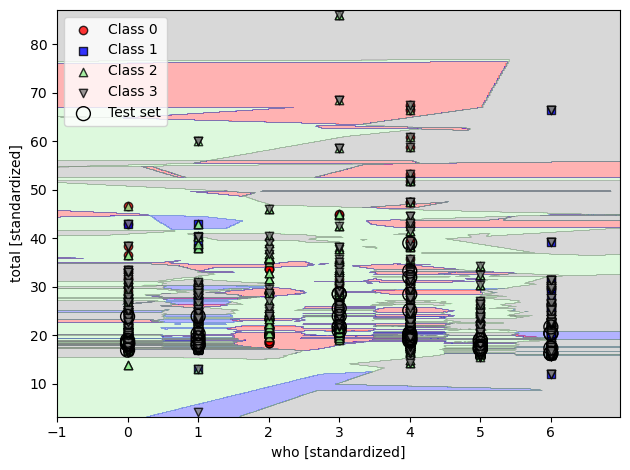

In [76]:
#total
X = y_df.iloc[:, [13, 15]]  # who, total
y = y_df.iloc[:, [48]] # pred

X_combined_std, y_combined, knn =  decision_Perceptron(X, y)

from sklearn.tree import DecisionTreeClassifier
plot_decision_regions(X=X_combined_std, 
                      y=y_combined,
                      classifier=knn, 
                      test_idx=range(105, 150))
plt.xlabel('who [standardized]')
plt.ylabel('total [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

__pred values:  {'IvarosKAN': 0, 'IvarosSZUKA': 1, 'ivartaLanKAN': 2, 'ivartaLanSZUKA': 3}__   
__A fenti jelöléseket figyelembe véve nem látok kapcsolatot a csapatok gyözelmi esélyei(WLT)__  
__és aközött, hogy milyen rákövetkező futások voltak__

Class labels: [0 1 2 3]


C:\Users\zertr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


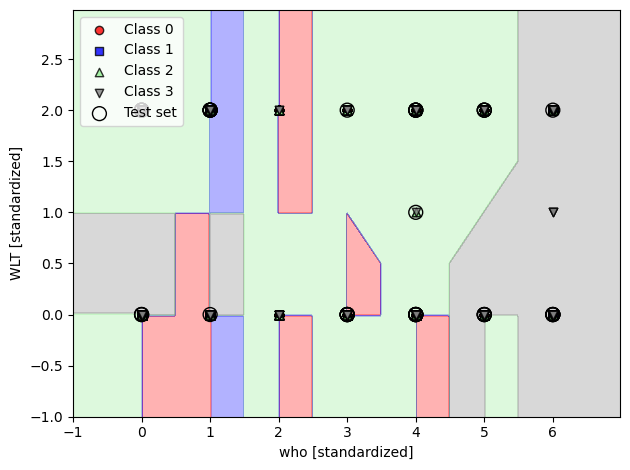

In [77]:
#WLT
X = y_df.iloc[:, [13, 16]]  # who, WLT
y = y_df.iloc[:, [48]] # pred

X_combined_std, y_combined, knn =  decision_Perceptron(X, y)

from sklearn.tree import DecisionTreeClassifier
plot_decision_regions(X=X_combined_std, 
                      y=y_combined,
                      classifier=knn, 
                      test_idx=range(105, 150))
plt.xlabel('who [standardized]')
plt.ylabel('WLT [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()